In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import filters
from skimage import morphology as morph
%matplotlib inline

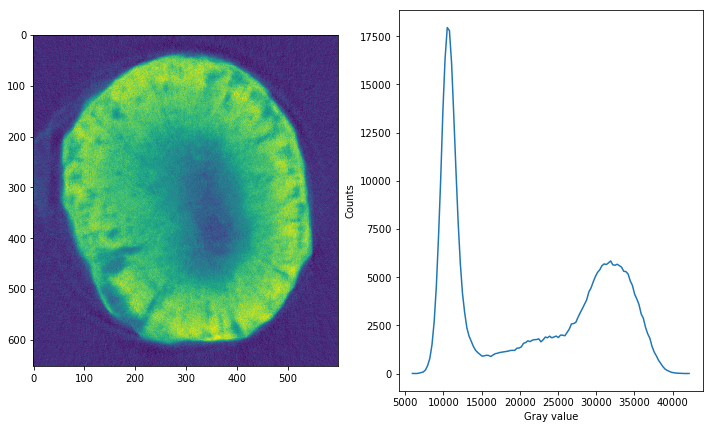

In [5]:
img=plt.imread('../data/ct_slice.tif')
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
hist,axis = np.histogram(img,bins=128)
plt.plot(axis[0:-1],hist)
plt.xlabel('Gray value')
plt.ylabel('Counts')

The threshold according to 21444


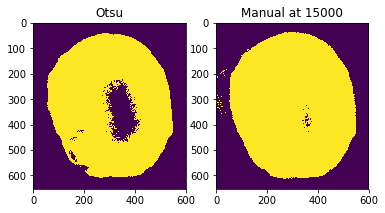

In [11]:
otsu = filters.threshold_otsu(img)
print('The threshold according to',otsu)
plt.subplot(1,2,1)
plt.imshow(otsu<img)
plt.title('Otsu')
plt.subplot(1,2,2)
th=15000
plt.imshow(th<img)
plt.title("Manual at 15000")

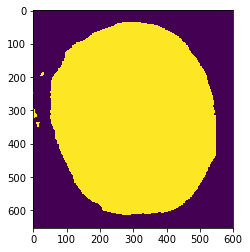

In [20]:
N=5
bl=morph.opening(morph.closing(th<img,np.ones([N,N])),np.ones([N,N]))
plt.imshow(bl)

241.35036772294339

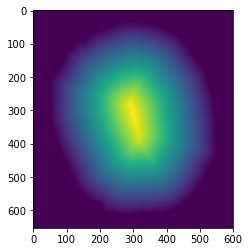

In [22]:
dm=ndimage.distance_transform_edt(bl)
plt.imshow(dm)
dm.max()

<function matplotlib.pyplot.tight_layout>

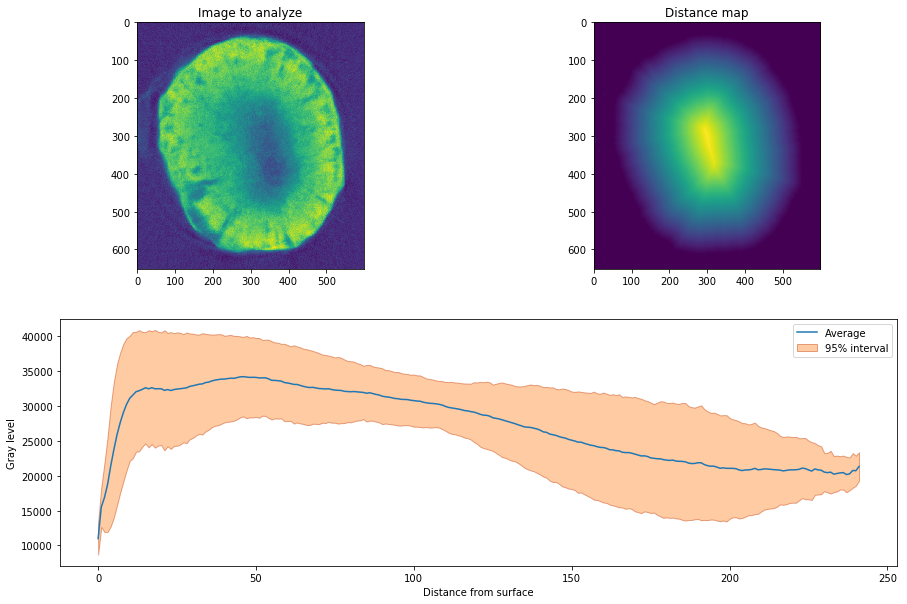

In [37]:
dmr=dm.round();

m=[]
s=[]
dist=np.arange(0,dmr.max()+1)
for d in dist:
    data=img[dmr==d];
    m.append(data.mean())
    s.append(data.std())

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Image to analyze')
plt.subplot(2,2,2)
plt.imshow(dmr)
plt.title('Distance map')
plt.subplot(2,1,2)
plt.plot(dist,m,label='Average')
error=np.array(s)*1.96
plt.fill_between(dist, m-error, m+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848',label='95% interval')
plt.xlabel('Distance from surface')
plt.ylabel('Gray level')
plt.legend()
plt.tight_layout